# Machine Learning Assignment


# Clustering

# Question 1 a

In [893]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics.cluster import contingency_matrix
from numpy import random
import pandas as pd
from scipy.stats import multivariate_normal

In [176]:
cov_matrix = 3**2 * np.eye(2) 

X_Q = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix, size=500)

y_Q = np.zeros(500, dtype=int)


In [177]:
def generate_Xa(a):
        
    Xa = np.random.multivariate_normal(mean=[a, 0], cov=np.eye(2), size=500)

    ya = np.ones(500, dtype=int)
    
    return Xa, ya

In [178]:
X_datasets = {}
y_labels = {}

for a in range(5):
    Xa, ya = generate_Xa(a)
    X_dataset_combined = np.vstack((X_Q, Xa))
    y_dataset_combined = np.concatenate((y_Q, ya))
    
    X_datasets[f'X_{a}Q'] = X_dataset_combined
    y_labels[f'y_{a}Q'] = y_dataset_combined


In [179]:
num_clusters = len(np.unique(y_labels['y_0Q'])) # since all lables have 0 and 1

kmeans_results = {}
em_results = {}

for key, X_dataset in X_datasets.items():
    kmeans_results[key] = []
    for i in range(10):
        kmeans = KMeans(n_clusters=num_clusters, init='random', n_init=1, random_state=i)
        kmeans.fit(X_dataset)
        kmeans_results[key].append(kmeans)

    em_results[key] = []
    for i in range(10):
        em = GaussianMixture(n_components=num_clusters, covariance_type='full', init_params='random', n_init=1, random_state=i)
        em.fit(X_dataset)
        em_results[key].append(em)

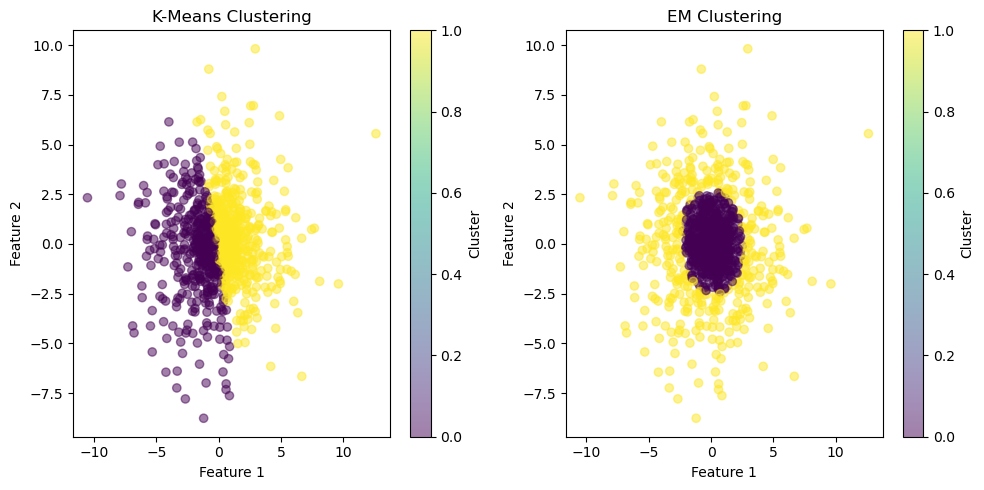

In [180]:

# we are choosing 5th Run

kmeans_model_a_0 = kmeans_results['X_0Q'][5]
em_model_a_0 = em_results['X_0Q'][5]

kmeans_labels_a_0 = kmeans_model_a_0.predict(X_datasets['X_0Q'])
em_labels_a_0 = em_model_a_0.predict(X_datasets['X_0Q'])


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_datasets['X_0Q'][:, 0], X_datasets['X_0Q'][:, 1], c=kmeans_labels_a_0, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(X_datasets['X_0Q'][:, 0], X_datasets['X_0Q'][:, 1], c=em_labels_a_0, cmap='viridis', alpha=0.5)
plt.title('EM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


In [12]:
def compute_metrics(y_true, y_pred):
    cont_matrix = contingency_matrix(y_true, y_pred)
    
    row_ind, col_ind = linear_sum_assignment(-cont_matrix)
    
    accuracy = np.sum(cont_matrix[row_ind, col_ind]) / len(y_true)

    ari = adjusted_rand_score(y_true, y_pred)

    return accuracy, ari

In [182]:
kmeans_metrics_all = {}
em_metrics_all = {}


for a in range(5):
    dataset_key = f"X_{a}Q"
    label_key = f"y_{a}Q"

    kmeans_metrics = []
    em_metrics = []
    
 
    true_labels = y_labels[label_key]
    
   
    for run_index in range(10):
      
        kmeans_accuracy, kmeans_ari = compute_metrics(true_labels, kmeans_results[dataset_key][run_index].labels_)
        kmeans_metrics.append((kmeans_accuracy, kmeans_ari))

   
        em_accuracy, em_ari = compute_metrics(true_labels, em_results[dataset_key][run_index].predict(X_datasets[dataset_key]))
        em_metrics.append((em_accuracy, em_ari))

    kmeans_metrics_all[dataset_key] = kmeans_metrics
    em_metrics_all[dataset_key] = em_metrics


for dataset_key in kmeans_metrics_all.keys(): 
    print()
    print(f"Dataset: {dataset_key}")
    print("Accuracy and ARI for k-means clustering:")
    for i, (accuracy, ari) in enumerate(kmeans_metrics_all[dataset_key]):
        print(f"Run {i + 1}: Accuracy = {accuracy:.4f}, ARI = {ari:.4f}")

    print("\nAccuracy and ARI for EM clustering:")
    for i, (accuracy, ari) in enumerate(em_metrics_all[dataset_key]):
        print(f"Run {i + 1}: Accuracy = {accuracy:.4f}, ARI = {ari:.4f}")



Dataset: X_0Q
Accuracy and ARI for k-means clustering:
Run 1: Accuracy = 0.5780, ARI = 0.0234
Run 2: Accuracy = 0.5160, ARI = 0.0000
Run 3: Accuracy = 0.5080, ARI = -0.0007
Run 4: Accuracy = 0.5480, ARI = 0.0082
Run 5: Accuracy = 0.5700, ARI = 0.0187
Run 6: Accuracy = 0.5520, ARI = 0.0098
Run 7: Accuracy = 0.5710, ARI = 0.0192
Run 8: Accuracy = 0.5850, ARI = 0.0280
Run 9: Accuracy = 0.5740, ARI = 0.0210
Run 10: Accuracy = 0.5160, ARI = 0.0000

Accuracy and ARI for EM clustering:
Run 1: Accuracy = 0.8300, ARI = 0.4351
Run 2: Accuracy = 0.8320, ARI = 0.4404
Run 3: Accuracy = 0.6750, ARI = 0.1219
Run 4: Accuracy = 0.5550, ARI = 0.0112
Run 5: Accuracy = 0.8340, ARI = 0.4457
Run 6: Accuracy = 0.8350, ARI = 0.4484
Run 7: Accuracy = 0.5410, ARI = 0.0058
Run 8: Accuracy = 0.8320, ARI = 0.4404
Run 9: Accuracy = 0.7050, ARI = 0.1675
Run 10: Accuracy = 0.8330, ARI = 0.4430

Dataset: X_1Q
Accuracy and ARI for k-means clustering:
Run 1: Accuracy = 0.6900, ARI = 0.1437
Run 2: Accuracy = 0.6850, ARI

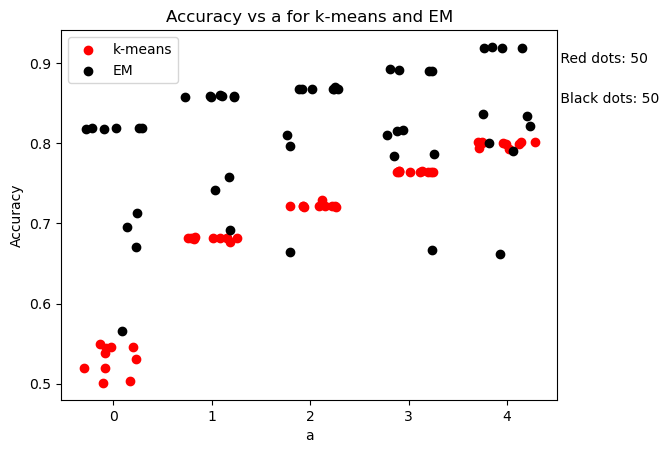

In [173]:
kmeans_accuracies = []
em_accuracies = []

for dataset_key in kmeans_metrics_all.keys():
    a = int(dataset_key.split('_')[1][:-1])
    
    kmeans_metrics = kmeans_metrics_all[dataset_key]
    em_metrics = em_metrics_all[dataset_key]
    
    for i in range(10):
        kmeans_accuracies.append((a, kmeans_metrics[i][0])) 
        em_accuracies.append((a, em_metrics[i][0]))          

a_kmeans, acc_kmeans = zip(*kmeans_accuracies)
a_em, acc_em = zip(*em_accuracies)


jitter_amount = 0.3
a_kmeans_jitter = np.array(a_kmeans) + np.random.uniform(-jitter_amount, jitter_amount, size=len(a_kmeans))
a_em_jitter = np.array(a_em) + np.random.uniform(-jitter_amount, jitter_amount, size=len(a_em))

plt.scatter(a_kmeans_jitter, acc_kmeans, color='red', label='k-means')
plt.scatter(a_em_jitter, acc_em, color='black', label='EM')

plt.xlabel('a')
plt.ylabel('Accuracy')
plt.xticks(range(5))
plt.title('Accuracy vs a for k-means and EM')
plt.legend()

plt.text(4.5, 0.9, f' Red dots: {len(acc_kmeans)}')
plt.text(4.5, 0.85, f' Black dots: {len(acc_em)}')

plt.show()

# added jitter for interpretability of scatter plots (to deal with overlapping data points)

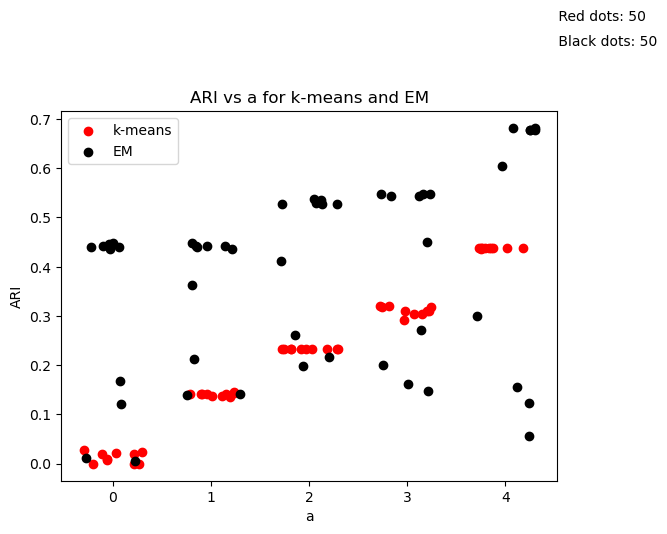

In [183]:
kmeans_ari_values = []
em_ari_values = []

for dataset_key in kmeans_metrics_all.keys():
    a = int(dataset_key.split('_')[1][:-1])
    
    kmeans_metrics = kmeans_metrics_all[dataset_key]
    em_metrics = em_metrics_all[dataset_key]
    
    for i in range(10):
        kmeans_ari_values.append((a, kmeans_metrics[i][1])) 
        em_ari_values.append((a, em_metrics[i][1]))     

a_kmeans_ari, ari_kmeans = zip(*kmeans_ari_values)
a_em_ari, ari_em = zip(*em_ari_values)


jitter_amount = 0.3 
a_kmeans_ari_jitter = np.array(a_kmeans_ari) + np.random.uniform(-jitter_amount, jitter_amount, size=len(a_kmeans_ari))
a_em_ari_jitter = np.array(a_em_ari) + np.random.uniform(-jitter_amount, jitter_amount, size=len(a_em_ari))

plt.scatter(a_kmeans_ari_jitter, ari_kmeans, color='red', label='k-means')
plt.scatter(a_em_ari_jitter, ari_em, color='black', label='EM')

plt.xlabel('a')
plt.ylabel('ARI')
plt.xticks(range(5))
plt.title('ARI vs a for k-means and EM')
plt.legend()

plt.text(4.5, 0.9, f' Red dots: {len(ari_kmeans)}')
plt.text(4.5, 0.85, f' Black dots: {len(ari_em)}')

plt.show()

# added jitter for interpretability of scatter plots (to deal with overlapping data points)

# Question 1 b

In [1103]:
def calculate_KL_divergence(Cov_matrix):
   
    mean_P = np.array([10, 0])  
    mean_Q = np.array([0, 0])

    mean_difference = mean_Q - mean_P

    Inv_Cov_matrix = np.linalg.inv(Cov_matrix)

    distance_term = np.dot(np.dot(mean_difference, Inv_Cov_matrix), mean_difference)

    trace = np.trace(np.dot(Inv_Cov_matrix, Cov_matrix))

    log_det_Sigma = 0 # Since both covariance matrix is same

    d = len(mean_P)

    KL_divergence = 0.5 * (0 - d + trace + distance_term)

    return KL_divergence

In [1104]:
def kmeans_with_isotropic(X, n_clusters, max_iters=300, tol=1e-4):
    n_samples, n_features = X.shape
    
 
    cluster_centers = X[np.random.choice(n_samples, n_clusters, replace=False)]
    

    labels = np.zeros(n_samples)
    distances = np.zeros((n_samples, n_clusters))
    
    for _ in range(max_iters):
       
        for i, center in enumerate(cluster_centers):
            distances[:, i] = np.linalg.norm(X - center, axis=1)
        new_labels = np.argmin(distances, axis=1)
        
       
        if np.all(new_labels == labels):
            break
        labels = new_labels
       
        for i in range(n_clusters):
            cluster_centers[i] = np.mean(X[labels == i], axis=0)
    
    return cluster_centers, labels



In [1105]:
def kmeans_with_full_covariance(X, n_clusters, max_iters=300, tol=1e-4):
    n_samples, n_features = X.shape
    
    cluster_centers = X[np.random.choice(n_samples, n_clusters, replace=False)]
    
    labels = np.zeros(n_samples)
    distances = np.zeros((n_samples, n_clusters))
    
    for _ in range(max_iters):
     
        for i, center in enumerate(cluster_centers):
            diff = X - center
            distances[:, i] = np.sqrt(np.sum(np.dot(diff, np.linalg.inv(np.cov(X.T))) * diff, axis=1))
        

        new_labels = np.argmin(distances, axis=1)
        

        if np.all(new_labels == labels):
            break
        labels = new_labels
        

        for i in range(n_clusters):
            cluster_centers[i] = np.mean(X[labels == i], axis=0)
        

        cov_matrices = []
        for i in range(n_clusters):
            indices = np.where(labels == i)[0]
            if len(indices) > 1:
                diff = X[indices] - cluster_centers[i]
                cov_matrix = np.dot(diff.T, diff) / (len(indices) - 1)
                cov_matrices.append(cov_matrix)
            else:
                cov_matrices.append(np.zeros((n_features, n_features)))
        
    return cluster_centers, labels

In [1126]:
def fit_gaussian_mixture(X, n_components, max_iters=300, tol=1e-4, random_state=None):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    

    means = X[np.random.choice(n_samples, n_components, replace=False)]
    covariances = [np.cov(X.T) for _ in range(n_components)]
    weights = np.ones(n_components) / n_components

    log_likelihood_prev = -np.inf

    for _ in range(max_iters):
        # E-step
        responsibilities = np.zeros((n_samples, n_components))
        for k in range(n_components):
            responsibilities[:, k] = weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step
        means = np.dot(responsibilities.T, X) / responsibilities.sum(axis=0)[:, np.newaxis]
        covariances = [np.dot(responsibilities[:, k] * (X - means[k]).T, X - means[k]) / responsibilities[:, k].sum()
                       for k in range(n_components)]
        weights = responsibilities.mean(axis=0)


        log_likelihood = np.log(np.sum([weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])
                                         for k in range(n_components)]))

        if np.abs(log_likelihood - log_likelihood_prev) < tol:
            break

        log_likelihood_prev = log_likelihood

    return means, covariances, weights


Plots for Run 1


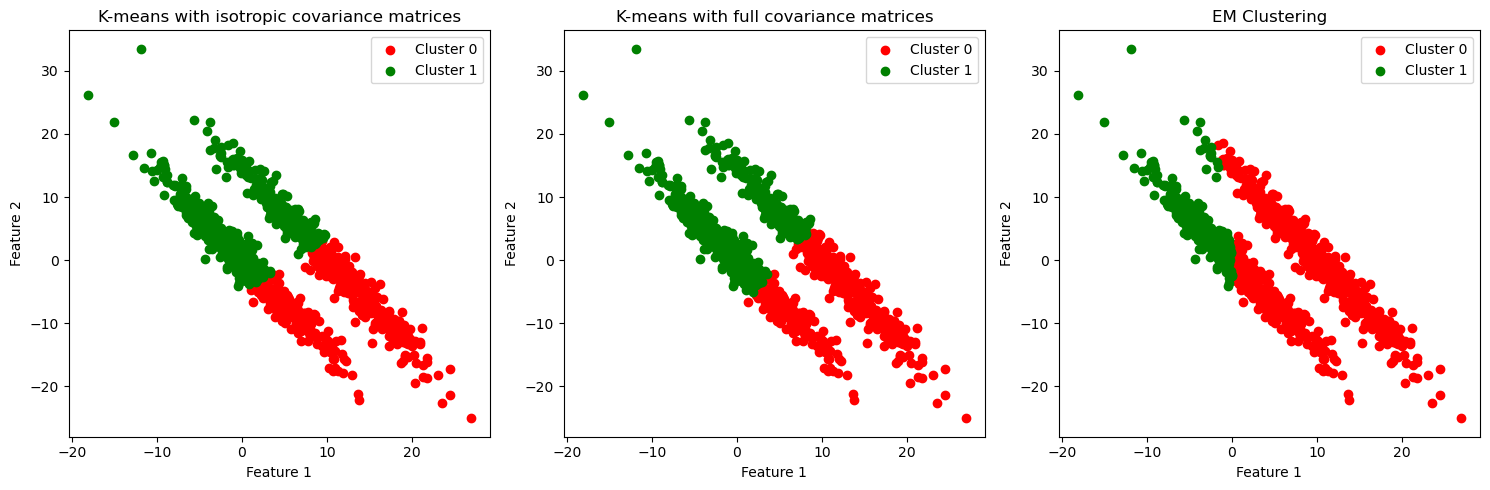

Plots for Run 2


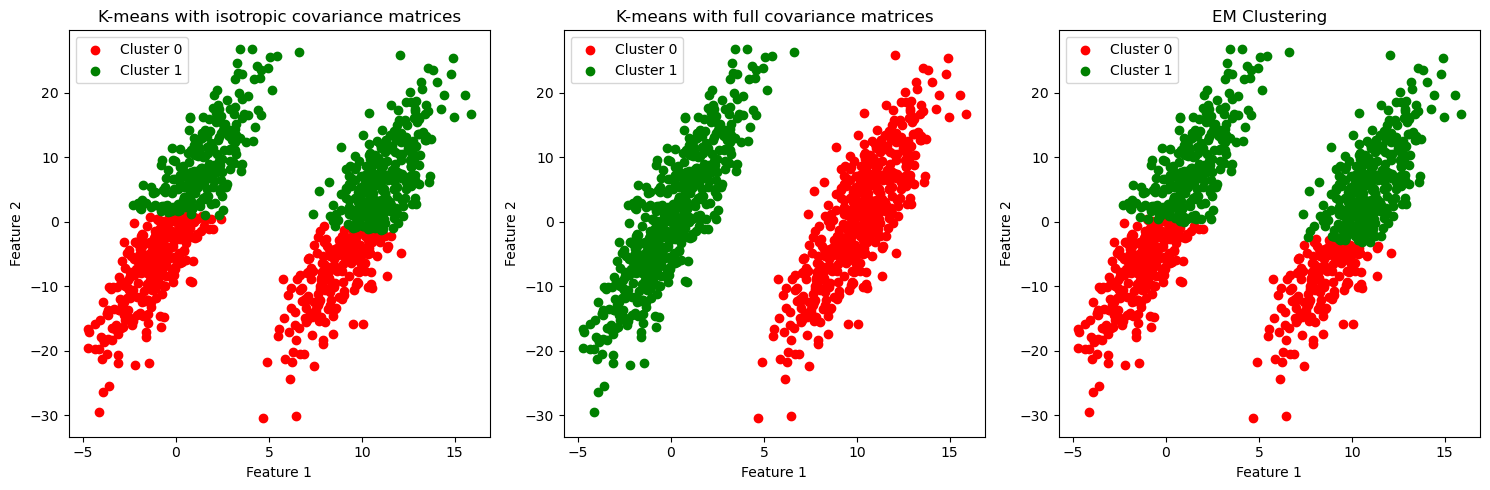

Plots for Run 3


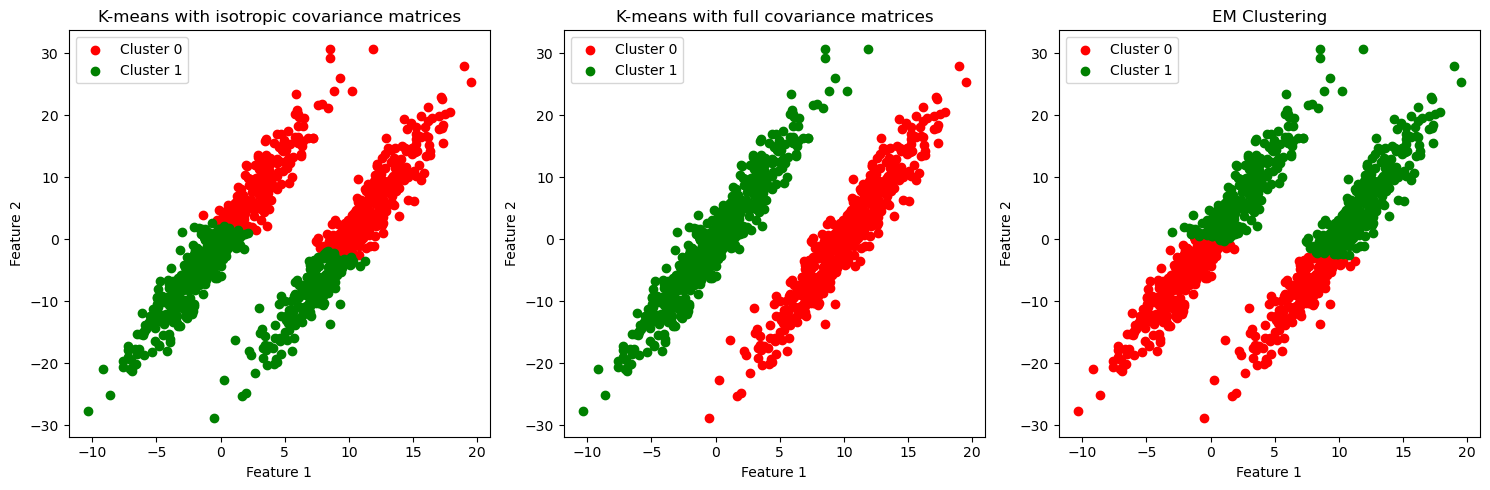

Plots for Run 4


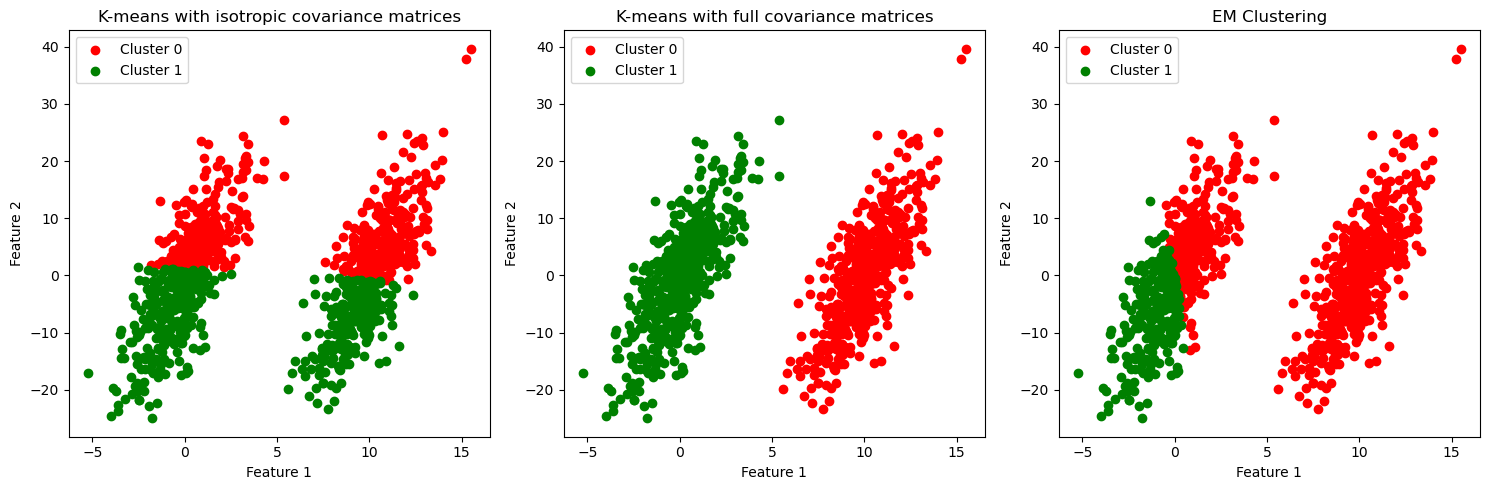

In [1139]:
results = {
    "kmeans_with_isotropic": [],
    "kmeans_full": [],
    "em_clustering": [],
    "KL_divergence": [] 
}

for run_number in range(10):
    
    M_matrix = np.random.normal(0, 1, (2, 2))
    
    U, D, Vt = np.linalg.svd(M_matrix)
    
    U_matrix = U
    
    Cov_matrix = np.dot(U_matrix, np.dot(np.diag([100, 1]), U_matrix.T))
    
    Q = np.random.multivariate_normal(mean=[0, 0], cov=Cov_matrix, size=500)
    Q_labels = np.zeros(500)
    P = np.random.multivariate_normal(mean=[10, 0], cov=Cov_matrix, size=500)
    P_labels = np.ones(500)
    
    #KL_divergence = calculate_KL_divergence(P, Q, Cov_matrix)
    
    KL_divergence = calculate_KL_divergence(Cov_matrix)
    
    QP_dataset = np.vstack((Q, P))
    true_labels = np.concatenate((Q_labels, P_labels))
    
    _, kmeans_iso_labels = kmeans_with_isotropic(QP_dataset, n_clusters=2)
    _, kmeans_full_labels = kmeans_with_full_covariance(QP_dataset, n_clusters=2)
       
    means, covariances, weights = fit_gaussian_mixture(QP_dataset, n_components=2)
    em_labels = np.argmax(np.dot(QP_dataset, means.T) + np.log(weights), axis=1)
    
    accuracy_iso, ari_iso = compute_metrics(true_labels, kmeans_iso_labels)
    accuracy_full, ari_full = compute_metrics(true_labels, kmeans_full_labels)
    accuracy_em, ari_em = compute_metrics(true_labels, em_labels)
    
  
    results["kmeans_with_isotropic"].append({"run_number": run_number + 1, "accuracy": accuracy_iso, "ari": ari_iso})
    results["kmeans_full"].append({"run_number": run_number + 1, "accuracy": accuracy_full, "ari": ari_full})
    results["em_clustering"].append({"run_number": run_number + 1, "accuracy": accuracy_em, "ari": ari_em})
    results["KL_divergence"].append(KL_divergence)  
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    if run_number < 4:
        
        print(f"Plots for Run {run_number + 1}")
    
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        for label in np.unique(kmeans_iso_labels):
            plt.scatter(QP_dataset[kmeans_iso_labels == label][:, 0], QP_dataset[kmeans_iso_labels == label][:, 1], color=colors[label], label=f'Cluster {label}')
        plt.title('K-means with isotropic covariance matrices')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()

        plt.subplot(1, 3, 2)
        for label in np.unique(kmeans_full_labels):
            plt.scatter(QP_dataset[kmeans_full_labels == label][:, 0], QP_dataset[kmeans_full_labels == label][:, 1], color=colors[label], label=f'Cluster {label}')
        plt.title('K-means with full covariance matrices')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()

        plt.subplot(1, 3, 3)
        for label in np.unique(em_labels):
            plt.scatter(QP_dataset[em_labels == label][:, 0], QP_dataset[em_labels == label][:, 1], color=colors[label], label=f'Cluster {label}')
        plt.title('EM Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()

        plt.tight_layout()
        plt.show()


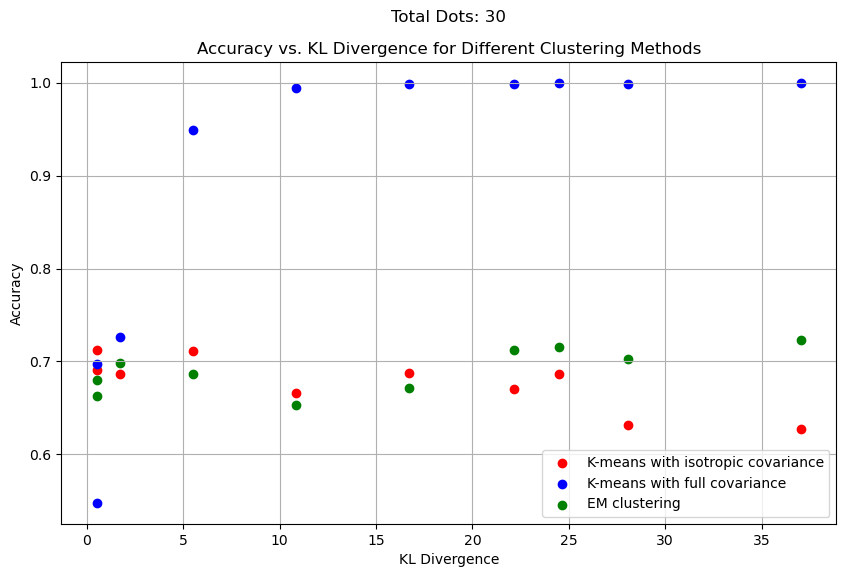

In [1120]:
kmeans_iso_accuracy = [result['accuracy'] for result in results['kmeans_with_isotropic']]
kmeans_full_accuracy = [result['accuracy'] for result in results['kmeans_full']]
em_accuracy = [result['accuracy'] for result in results['em_clustering']]
kl_divergence = results['KL_divergence']


plt.figure(figsize=(10, 6))

plt.scatter(kl_divergence, kmeans_iso_accuracy, color='red', label='K-means with isotropic covariance')
plt.scatter(kl_divergence, kmeans_full_accuracy, color='blue', label='K-means with full covariance')
plt.scatter(kl_divergence, em_accuracy, color='green', label='EM clustering')

plt.xlabel('KL Divergence')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. KL Divergence for Different Clustering Methods')
plt.legend()
plt.grid(True)

total_dots = len(kmeans_iso_accuracy) + len(kmeans_full_accuracy) + len(em_accuracy)

plt.annotate(f'Total Dots: {total_dots}', xy=(0.5, 1.05), xycoords='axes fraction',
             xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)


plt.show()


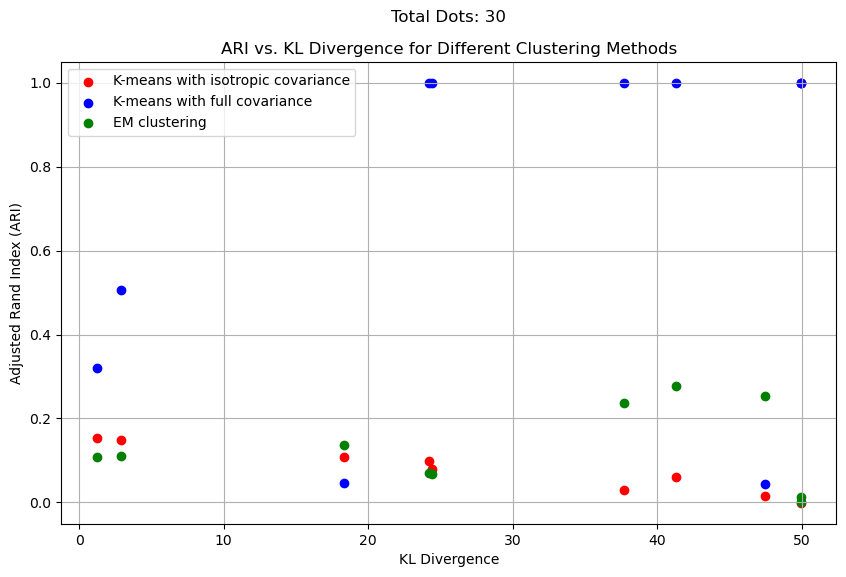

In [1079]:
kmeans_iso_ari = [result['ari'] for result in results['kmeans_with_isotropic']]
kmeans_full_ari = [result['ari'] for result in results['kmeans_full']]
em_ari = [result['ari'] for result in results['em_clustering']]
kl_divergence = results['KL_divergence']

plt.figure(figsize=(10, 6))

plt.scatter(kl_divergence, kmeans_iso_ari, color='red', label='K-means with isotropic covariance')
plt.scatter(kl_divergence, kmeans_full_ari, color='blue', label='K-means with full covariance')
plt.scatter(kl_divergence, em_ari, color='green', label='EM clustering')

plt.xlabel('KL Divergence')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('ARI vs. KL Divergence for Different Clustering Methods')

plt.legend()
plt.grid(True)


total_dots = len(kmeans_iso_ari) + len(kmeans_full_ari) + len(em_ari)

plt.annotate(f'Total Dots: {total_dots}', xy=(0.5, 1.05), xycoords='axes fraction',
             xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.show()


In [1140]:
kmeans_iso_accuracy = [result['accuracy'] for result in results['kmeans_with_isotropic']]
kmeans_iso_ari = [result['ari'] for result in results['kmeans_with_isotropic']]
kmeans_full_accuracy = [result['accuracy'] for result in results['kmeans_full']]
kmeans_full_ari = [result['ari'] for result in results['kmeans_full']]
em_accuracy = [result['accuracy'] for result in results['em_clustering']]
em_ari = [result['ari'] for result in results['em_clustering']]
kl_divergence = results['KL_divergence']

df = pd.DataFrame({
    "Run": [i + 1 for i in range(10)],
    "KIso(Accuracy)": kmeans_iso_accuracy,
    "KIso(ARI)": kmeans_iso_ari,
    "KFull(Accuracy)": kmeans_full_accuracy,
    "KFull(ARI)": kmeans_full_ari,
    "EM(Accuracy)": em_accuracy,
    "EM(ARI)": em_ari,
    "KL Divergence": kl_divergence
})


pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

print(df)


   Run  KIso(Accuracy)  KIso(ARI)  KFull(Accuracy)  KFull(ARI)  EM(Accuracy)   EM(ARI)  KL Divergence
0    1           0.622   0.058595            0.654    0.093957         0.734  0.218413      33.854417
1    2           0.562   0.014391            1.000    1.000000         0.572  0.019774      48.573051
2    3           0.615   0.051951            1.000    1.000000         0.583  0.026587      44.934097
3    4           0.542   0.006066            1.000    1.000000         0.757  0.263633      49.247311
4    5           0.583   0.026593            1.000    1.000000         0.723  0.198353      43.191435
5    6           0.642   0.079736            1.000    1.000000         0.705  0.167435      26.753354
6    7           0.619   0.055700            0.687    0.139016         0.705  0.167467      29.052020
7    8           0.644   0.082032            0.554    0.010677         0.707  0.170692      16.306208
8    9           0.572   0.019755            1.000    1.000000         0.761  0.27